# About Data
- wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2

    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8


#  Import Libiraies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Get Data

In [44]:
df = load_wine(as_frame=True)
wine=df.frame
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [45]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [46]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [47]:
wine['target'].value_counts(normalize=True)

,proportion
target,
1,0.398876
0,0.331461
2,0.269663


In [48]:
print("\nMissing Values:", wine.isnull().sum())


Missing Values: alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [49]:
# Calculate IQR for each feature
Q1 = wine.quantile(0.25) # Q1 (First Quartile): The 25th percentile value for each feature.
Q3 = wine.quantile(0.75) # Q3 (Third Quartile): The 75th percentile value for each feature.

IQR = Q3 - Q1 #  the middle 50% of the data.

# Define outliers based on IQR
outliers = ((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR))) # An outlier is defined as a value less than Q1 - 1.5 × IQR or greater than Q3 + 1.5 × IQR.


# Optionally, you can identify and print the rows containing outliers
outlier_rows = wine[outliers.any(axis=1)]
outlier_rows

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


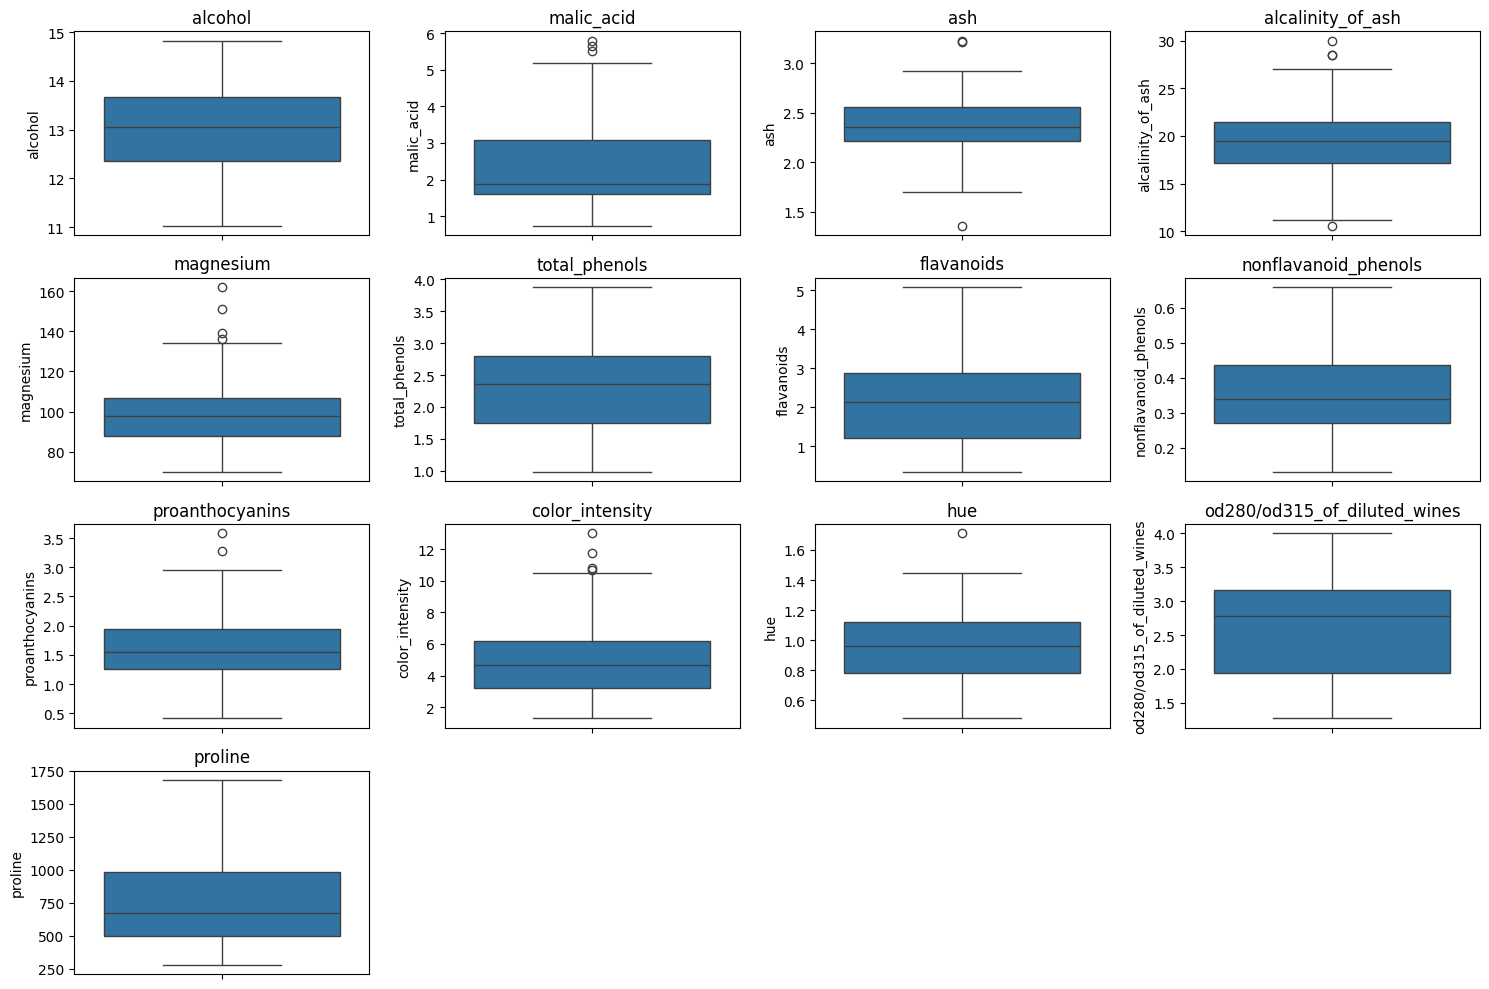

In [50]:
# Visualize outliers for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(wine.columns):
    if col != 'target':  # Exclude the target variable
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=wine[col])
        plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
wine_cleaned = wine.copy()
wine_cleaned= wine.mask(outliers, np.nan).fillna(wine.median())


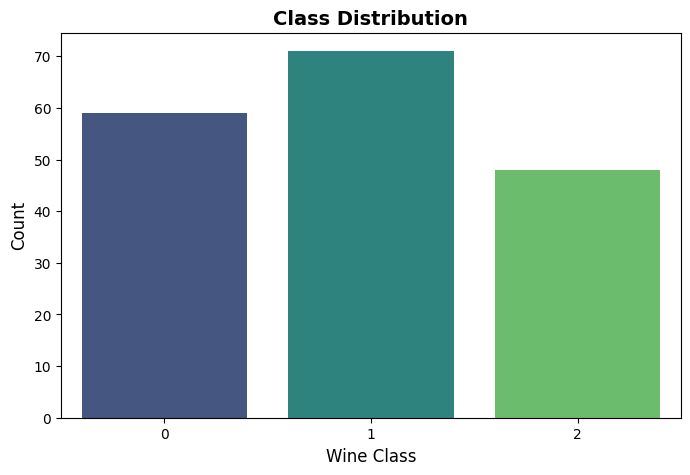

In [52]:
# Visualizing distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=wine_cleaned['target'], palette='viridis')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Wine Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

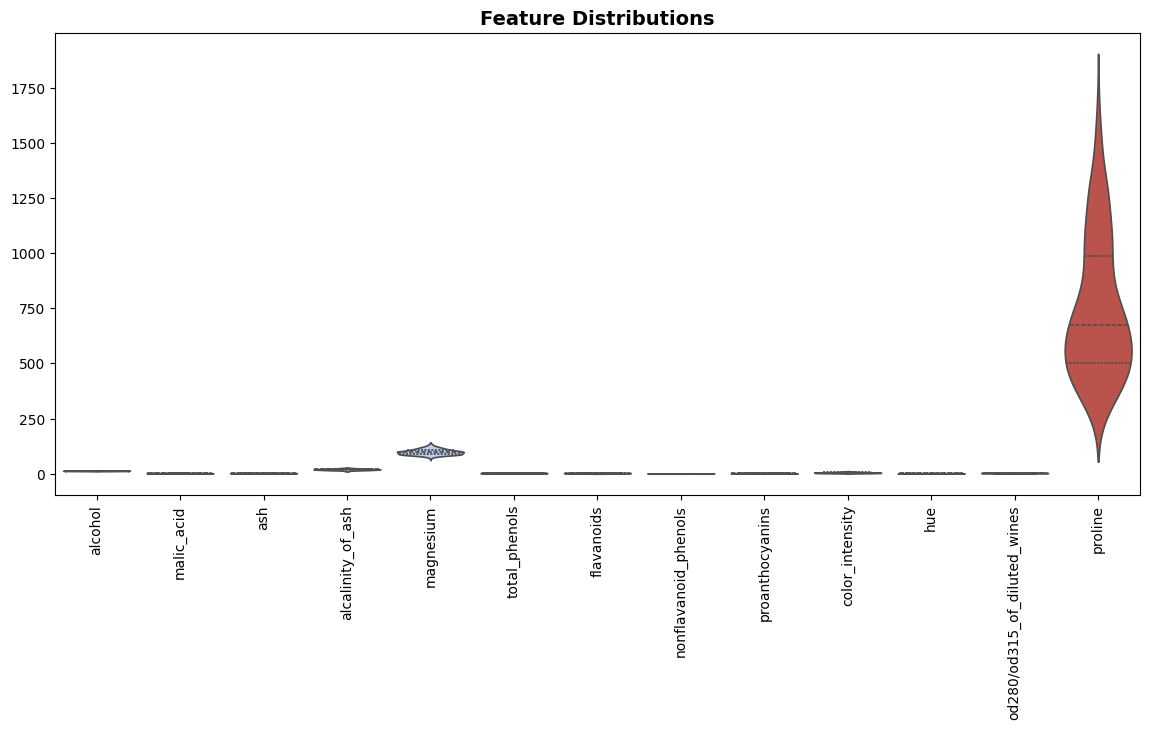

In [53]:
# Violin plots for feature distribution
plt.figure(figsize=(14, 6))
sns.violinplot(data=wine_cleaned.iloc[:, :-1], palette='coolwarm', inner='quartile')
plt.xticks(rotation=90)
plt.title('Feature Distributions', fontsize=14, fontweight='bold')
plt.show()

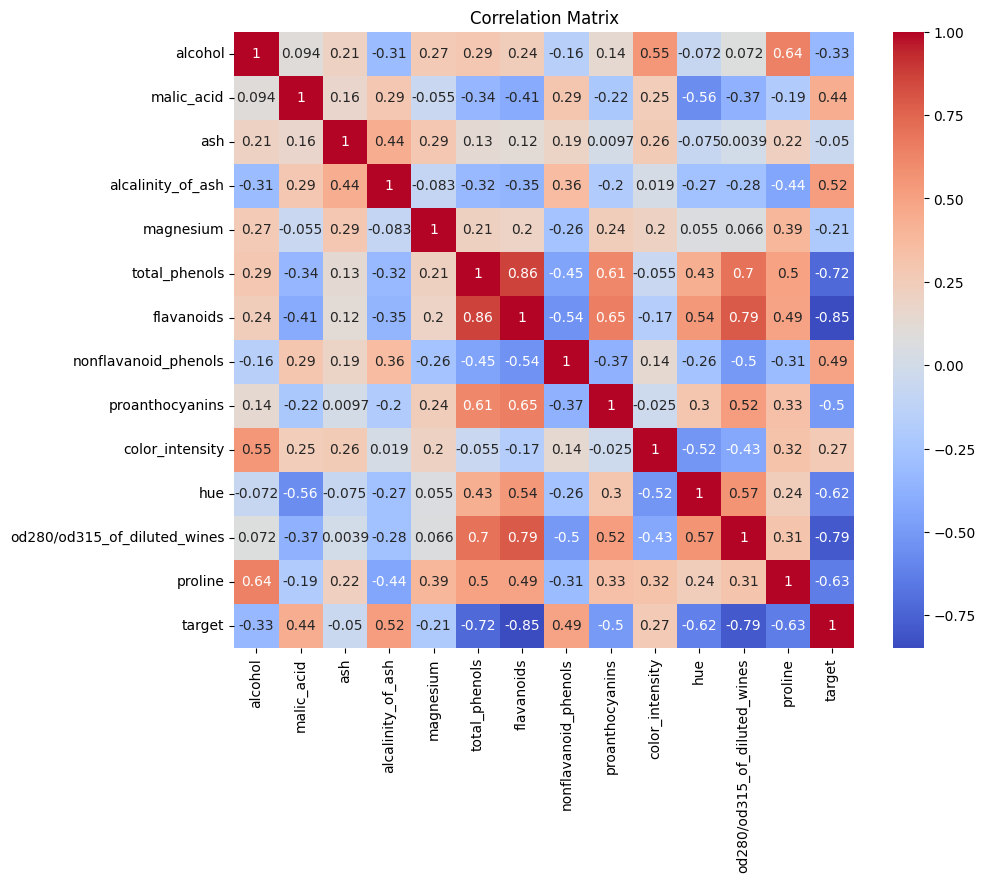

In [54]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
print("Data preprocessing complete! Ready for modeling.")

Data preprocessing complete! Ready for modeling.


# Transformation and train

In [70]:
X = wine.drop('target', axis=1)
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [72]:
y_train.value_counts(normalize=True)

,proportion
target,
1,0.398496
0,0.330827
2,0.270677


In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

In [75]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

In [76]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [77]:
rnd_search_cv.best_score_

0.9925925925925926

In [78]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

In [87]:
# Save the best model
import pickle

with open("best_model.pkl", "wb") as file:
    pickle.dump(rnd_search_cv.best_estimator_, file)

print("Best Score:", rnd_search_cv.best_score_)

Best Score: 0.9925925925925926


In [85]:
import streamlit as st
# Sidebar
st.sidebar.header("Settings")
plot_type = st.sidebar.selectbox("Select Plot Type", ["Count Plot", "Violin Plot", "Correlation Heatmap"])

# Visualization
if plot_type == "Count Plot":
    st.subheader("Class Distribution")
    fig, ax = plt.subplots()
    sns.countplot(x=wine['target'], palette='viridis', edgecolor='black', ax=ax)
    ax.set_title('Class Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Wine Class', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    st.pyplot(fig)

elif plot_type == "Violin Plot":
    st.subheader("Feature Distributions")
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.violinplot(data=wine.iloc[:, :-1], palette='coolwarm', inner='quartile', ax=ax)
    plt.xticks(rotation=90)
    plt.title('Feature Distributions', fontsize=14, fontweight='bold')
    st.pyplot(fig)

elif plot_type == "Correlation Heatmap":
    st.subheader("Feature Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', ax=ax)
    plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
    st.pyplot(fig)

2025-02-05 21:50:23.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 21:50:23.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
data = load_wine()
feature_names = data.feature_names

# Load trained model
with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

# Streamlit UI
st.title("Wine Classification Model Deployment 🍷")
st.write("Enter the wine characteristics to predict its class.")

# Input fields for user
input_values = []
for feature in feature_names:
    value = st.number_input(f"Enter {feature}", step=0.1)
    input_values.append(value)

# Predict button
if st.button("Predict"):
    input_array = np.array(input_values).reshape(1, -1)

    # Standardization (ensure you use the same scaler as training)
    scaler = StandardScaler()
    input_scaled = scaler.fit_transform(input_array)

    prediction = model.predict(input_scaled)
    st.success(f"Predicted Wine Class: {prediction[0]}")
